# Birthday Probability 

In this lab the goal is to determine the probabilty of 2 poeple in a group of any size who will have a birthday on the same exact day. To achieve this *we* considered everyday of the year as a possibility. A random number between 365 is generated and then a calculation is made to determine the percentage possibility.

In the cell below, a random bithday is generated from numbers ranging from 1 to 365. This random number will be assigned to one person in the group number given. This is done for every person in the group.Returns a randomly genereated interger within the range specifed.

In [1]:
import random
def generate_birthday():
    """
    function that generates a random integer between the range of 1 to 365
    :return: a random integer
    """
    return random.randint(1,365)

In [2]:
help(generate_birthday)

Help on function generate_birthday in module __main__:

generate_birthday()
    function that generates a random integer between the range of 1 to 365
    :return: a random integer



## Calculation Cell. 
That allows user to enter a specified group number and the number of times they want to repeat the experiment.This is achieved using Monte Carlo method.

Monte Carlo simulation: using M - the number of times we generate a birthday probability in a group and N- the number of times we run the experiment.

In [3]:
def monte_carlo_method(G, N):
    """
    Calculates the probability of a given number of people who have the same birthday 
    :param int G: the number of people in a group
    :param int N: the number of rooms/ times the experiment should be repeated
    code for finding the birthday that was not unique(shared birthday) in the array, was inspired by geeks for geeks. Link below.
    https://www.geeksforgeeks.org/python-check-if-list-contains-all-unique-elements/
    """
    rooms_with_birthdays_shared = 0
    
    for i in range(N):
        birthdays = []
            
        for x in range(G):
            birthdays.append(generate_birthday())
    
        flag = len(set(birthdays)) == len(birthdays)

    
        if not flag:
            rooms_with_birthdays_shared += 1
            
    return rooms_with_birthdays_shared/N
            
        

This method calculates different probabilities for different group sizes ranging from 0 to 100, and puts the number of people in the group and thier corresponding probabilities into a dictionary.

In [4]:
def calculating_smallest_size(G = 100, N= 10500):
    
    group_probabilities = {}
    
    for i in range(G):
        group_probabilities[i] = monte_carlo_method(i, N)
        
    return group_probabilities
#     print(group_probabilities)

In [5]:
calculating_smallest_size(100, 10500)

{0: 0.0,
 1: 0.0,
 2: 0.17142857142857143,
 3: 0.8666666666666666,
 4: 1.7142857142857144,
 5: 2.7142857142857144,
 6: 4.647619047619048,
 7: 5.59047619047619,
 8: 8.304761904761905,
 9: 9.77142857142857,
 10: 11.085714285714285,
 11: 14.409523809523808,
 12: 16.314285714285713,
 13: 19.104761904761904,
 14: 21.590476190476192,
 15: 25.142857142857146,
 16: 28.142857142857142,
 17: 31.02857142857143,
 18: 34.97142857142857,
 19: 38.24761904761905,
 20: 41.50476190476191,
 21: 44.57142857142857,
 22: 47.14285714285714,
 23: 50.91428571428571,
 24: 54.095238095238095,
 25: 56.628571428571426,
 26: 59.57142857142858,
 27: 62.05714285714286,
 28: 65.34285714285714,
 29: 68.43809523809524,
 30: 70.11428571428571,
 31: 73.11428571428571,
 32: 75.76190476190476,
 33: 76.90476190476191,
 34: 78.67619047619047,
 35: 82.19999999999999,
 36: 83.27619047619048,
 37: 84.81904761904761,
 38: 86.28571428571429,
 39: 87.60952380952382,
 40: 89.2,
 41: 89.95238095238095,
 42: 91.48571428571428,
 43: 91

In [6]:
def small_group():
    smallest_size = {}
    smallest_size = calculating_smallest_size(100,10500)
    for i in smallest_size:
        if smallest_size[i] >= 50:
            print(i)
            return i
           

### BenchMarking results ###
Running on my laptop: 
Running on Rosie/cluster:
Explanation of difference 

In [7]:
%%time
monte_carlo_method(20,10500)
    
    

Wall time: 621 ms


41.41904761904762

CPU times: user 250 ms, sys: 0 ns, total: 250 ms
Wall time: 249 ms
It takes longer to run the cluster than running on my laptop, this may be because other programs could be running on the cluster. And this would make it take longer to run my code.

In [8]:
small_group()

## Graph ##
Below is the graph of group size G, vs the probability of a shared birthday.The number of times this was repeated using monte carlos method: N = 10500.


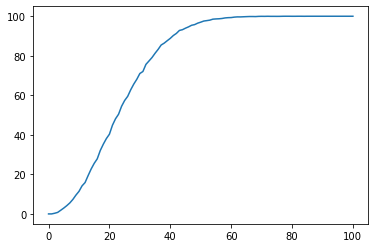

In [9]:
from matplotlib import pyplot as plt
G = []
probability = []
for x in range(101):
    G.append(x)
for y in range(len(G)):
    value = monte_carlo_method(y,10000)
    probability.append(value)
plt.plot(G,probability)
plt.title("Graph of probability")
plt.xlabel("Group sizes")
plt.ylabel("probability of shared birthdays")
plt.show()
    

1.What is the probability of a group of size 20 that at least one pair has the same birthday?
    - 41.6 % or 0.41
2.What is the smallest group size to have a probability of greater than 50% that two people share the same birthday?
    -23 
3.How large of an N is necessary to provide confidence in your answer? 
    - an N value greater or equal to 10000
4.How is this problem related to hash collisions?
    -Hashing is when two pieces of data have the same hash value. and in this case its similar because theres a hash collision everytime 2 or more people share a birthday.